# Block 47: Workshop
## __Building and Visualizing an Autoencoder with the Fashion MNIST Dataset__

## Problem Statement
Boston Dental Clinic is an old customer who wishes to use ML/DL capabilities to retain old patients and provide better service. The clinic is looking at cleaning its older X-Ray Database by denoising poorer X-Rays. A market research analysis has found that providing better quality historical X-rays is a sure-shot way of retaining customers.


## Steps 
1. Importing libraries
2. Loading the dataset and finding the shape of the data
3. Initializing the autoencoder
4. Compiling the autoencoder
5. Training the model
6. Visualizing the images

### Step 1: Importing Libraries
- Import the required library such as NumPy, Pandas, TensorFlow,and Matplotlib

In [1]:
# Import necessary libraries for data handling, visualization, and machine learning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Import specific modules for model evaluation and data splitting
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Import specific modules from TensorFlow for building neural network models
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

2024-11-07 15:02:43.585053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 15:02:43.706554: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-11-07 15:02:45.806788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Step 2: Loading the Dataset and Finding the Shape of the Data

- Dataset used: Fashion MNSIT dataset where each image is 28 *28 pixels
- Find the shape of the train and test data.

In [2]:
# Load the dataset
data = np.load('Dental-Panaromic-Autoencoder.npz')

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


# Convert the pixel values in the training set to 'float32' data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Print the shape of the training and testing sets to inspect the dimensions
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(92, 256, 256, 3)
(92,)
(24, 256, 256, 3)
(24,)


# Adding Noise

In [3]:
# Add Gaussian noise to the images
def add_noise(images, mean=0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = images + noise
    
    # Clip values to stay within [0, 1] for image data
    noisy_images = np.clip(noisy_images, 0, 1).astype(np.float32)
    return noisy_images

# add noise in the range [0, 1]
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

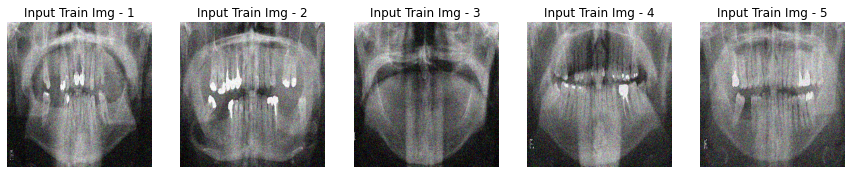

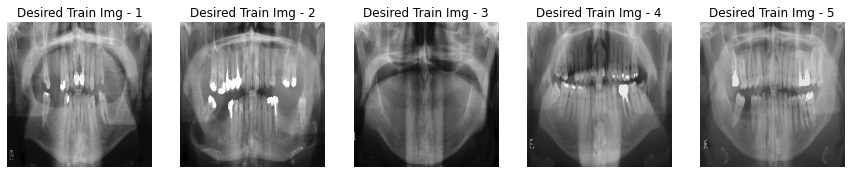

In [37]:
def plot_images(images, title, num_images=5):
    plt.figure(figsize=(15, 5))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(f'{title} {i+1}')
    
    plt.show()



# Plot first 5 noisy X-ray images
plot_images(x_train_noisy, "Input Train Img -")

# Plot first 5 original X-ray images
plot_images(x_train, "Desired Train Img -")

### Step 3: Initializing the Autoencoder

In [6]:
latent_dim = 64

# Define a class named Autoencoder that inherits from tf.keras.Model
class Denoise(Model):

  # Constructor method for initializing the Autoencoder object
  def __init__(self):
        
    # Call the constructor of the parent class (tf.keras.Model)
    super().__init__()

    #Define the encoder part of the autoencoder using a Sequential model
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(filters=64,kernel_size=(3,3), strides=2, padding="same", activation='relu'),
        layers.Conv2D(filters=32,kernel_size=(3,3), strides=2, padding="same", activation='relu')
    ])

    # Define the decoder part of the autoencoder using another Sequential model
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(filters=32,kernel_size=(3,3), strides=2, padding="same", activation='relu'),
        layers.Conv2DTranspose(filters=64,kernel_size=(3,3), strides=2, padding="same", activation='relu'),
        layers.Conv2DTranspose(filters=1,kernel_size=(3,3), padding="same", activation='sigmoid')
    ])

  # Define the 'call' method for the Autoencoder class
  def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

denoiser = Denoise()

### Step 4: Compiling the Autoencoder
- Call the __compile()__ method on the autoencoder object.
- Set the optimizer argument to __adam__. This specifies that the Adam optimizer will be used for training the autoencoder.
- Set the loss argument to __losses.MeanSquaredError()__. This specifies that the mean squared error loss function will be used for training the autoencoder.

In [43]:
#Call the compile() method on the autoencoder object, set the optimizer for training the model, set the loss function for training the model
denoiser.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Step 5: Training the Model
- Call the __fit()__ method on the autoencoder object.
- Pass __x_train__ as the first argument. x_train represents the input data for training the autoencoder.
- Pass __x_train__ again as the second argument. This is the target data for the autoencoder, which is also x_train in this case.
- Set the __epochs__ argument to __10__. This specifies the number of times the entire dataset will be iterated during training.
- Set the __shuffle__ argument to __True__. This indicates that the training data will be shuffled before each epoch during training.
- Set the validation_data argument to __(x_test, x_test)__. This provides the validation data to evaluate the performance of the autoencoder during training. x_test is the input validation data, and x_test is also used as the target validation data.

In [44]:
# Train the Autoencoder model using the fit method
denoiser.fit(x_train_noisy, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 0.0311 - mae: 0.1279 - val_loss: 0.0439 - val_mae: 0.1837
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 0.0284 - mae: 0.1360 - val_loss: 0.0069 - val_mae: 0.0702
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 0.0153 - mae: 0.1066 - val_loss: 0.0162 - val_mae: 0.1136
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 0.0091 - mae: 0.0770 - val_loss: 0.0035 - val_mae: 0.0414
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 0.0072 - mae: 0.0640 - val_loss: 0.0095 - val_mae: 0.0782
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 0.0061 - mae: 0.0565 - val_loss: 0.0028 - val_mae: 0.0361
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 0.0040 - mae: 0.0477 - val_loss: 0.0059 - val_mae: 0.0633
Epoch 8/50
3/3 [==============================] - 6s 2s/step - loss: 0.0056 - mae: 0.0611 - val_loss: 0.0040 - 

### Step 6: Encoding and Decoding the Images
- Call the encoder method of the autoencoder object on __x_test__. This encodes the input x_test using the trained autoencoder's encoder part.
- Call the __numpy()__ method on the encoded output to convert it into a NumPy array.
- This is done to extract the actual values from the TensorFlow tensor.
- Assign the encoded output to the variable __encoded_imgs__.
- Call the decoder method of the autoencoder object on encoded_imgs. This decodes the encoded images using the trained autoencoder's decoder part.
- Call the numpy() method on the decoded output to convert it into a NumPy array.
- Assign the decoded output to the variable __decoded_imgs__.

In [45]:
# Encode the images from the test set using the autoencoder's encoder
encoded_imgs = denoiser.encoder(x_test_noisy)

# Decode the encoded representations back to the original image space
decoded_imgs = denoiser.decoder(encoded_imgs)


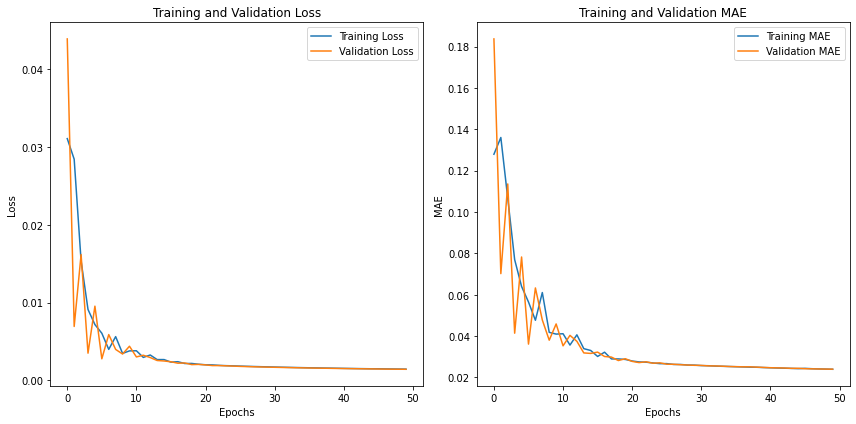

In [46]:
# Plotting Training & Validation Loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(denoiser.history.history['loss'], label='Training Loss')
plt.plot(denoiser.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(denoiser.history.history['mae'], label='Training MAE')
plt.plot(denoiser.history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

### Step 7: Displaying the Images

- Set up the figure and subplot layout
- Iterate through a range of n (in this case, 10) for displaying original and reconstructed images
- Display the original image in the current subplot, along with the __original__ title and grayscale colormap
- Display the reconstructed image in the next subplot, along with the __reconstructed__ title and grayscale colormap

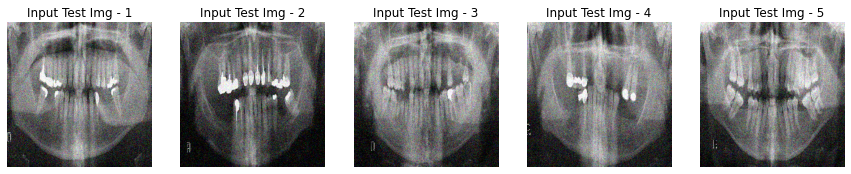

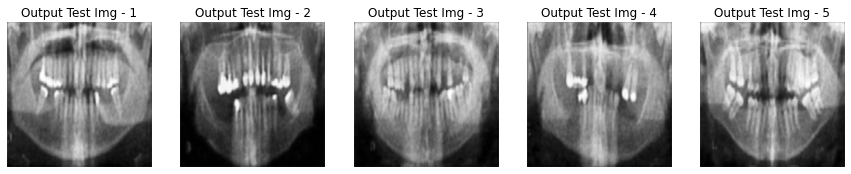

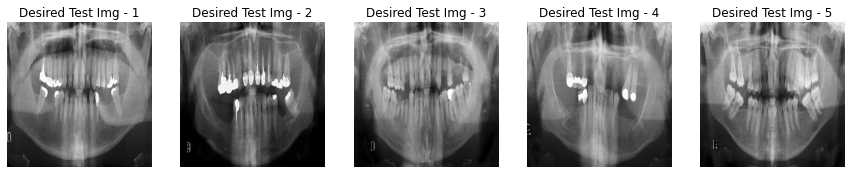

In [47]:
# Plot first 5 noisy X-ray images
plot_images(x_test_noisy, "Input Test Img -")

# Plot first 5 original X-ray images
plot_images(decoded_imgs, "Output Test Img -")

# Plot first 5 noisy X-ray images
plot_images(x_test, "Desired Test Img -")

# I am really Impressed! This did a great job denoising these images, I think it would be desirable to perform the same opperations on a larger dataset